# Pré processamento de dados
A base de dados utilizada oferecida pelo [Ministério da Justiça e Segurança Pública](https://www.gov.br/mj/pt-br/assuntos/sua-seguranca/seguranca-publica/estatistica/download/dnsp-base-de-dados) é um grande compilado de dados de todos os municipios de diversas fontes. Por isso, é possível encontrar informações ausentes, municipios não informados, dados com objetivos diferentes, etc...

Por causa disso, será necessário darmos uma filtrada e manipular esses dados para adequar ao uso dos nossos algoritmos.

In [24]:
import pandas as pd

CAMINHO_ARQUIVO = './BancoVDE 2025.xlsx'

In [25]:
df = pd.read_excel(CAMINHO_ARQUIVO)
df.head(5)

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total,total_peso,abrangencia,formulario
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.813,Estadual,Formulário 5
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.380,Estadual,Formulário 5
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.023,Estadual,Formulário 5
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.570,Estadual,Formulário 5
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.877,Estadual,Formulário 5


In [26]:
# Para nossa pesquisa, colunas como abrangencia, formulário, agente e arma não fazem tanto sentido.
# Além disso a coluna total_peso é referente apenas a crime de apreensão de drogas, e não é relevante para nossa análise.
print(df.columns.tolist())

['uf', 'municipio', 'evento', 'data_referencia', 'agente', 'arma', 'faixa_etaria', 'feminino', 'masculino', 'nao_informado', 'total_vitima', 'total', 'total_peso', 'abrangencia', 'formulario']


In [27]:
# Removendo colunas irrelevantes do dataset
colunas_para_remover = ['abrangencia', 'formulario', 'agente', 'arma', 'total_peso']
df = df.drop(columns=colunas_para_remover)
df.head(5)

,uf,municipio,evento,data_referencia,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# A coluna 'municipio' tem um valor 'NÃO INFORMADO' que não é útil para nossa análise, então vamos removê-lo.
df = df[df['municipio'] != 'NÃO INFORMADO']
df.head(5)

,uf,municipio,evento,data_referencia,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total
5508,AC,ACRELÂNDIA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5509,AC,ASSIS BRASIL,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5510,AC,BRASILÉIA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5511,AC,BUJARI,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5512,AC,CAPIXABA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN


In [29]:
# Após o tratamento dos dados, podemos observar que a faixa etaria só apresenta valores NaN, o que não é útil para nossa análise.
valores_unicos = df['faixa_etaria'].unique()
print("Valores únicos na coluna 'faixa_etaria':", valores_unicos)
df = df.drop(columns=['faixa_etaria'])

Valores únicos na coluna 'faixa_etaria': <StringArray>
[nan]
Length: 1, dtype: str


Agora, com os dados minimamente tratados, iremos tratar algumas inconsistências e remover mais dados irrelevantes.

In [30]:
# Análise da coluna total
df_filtrado = df[df['total'] > 0]
print("Valores únicos na coluna 'evento' após filtragem:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem: <StringArray>
['Mandado de prisão cumprido']
Length: 1, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima,total
208476,AC,ACRELÂNDIA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,4.0
208478,AC,BRASILÉIA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,2.0
208479,AC,BUJARI,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,1.0
208480,AC,CAPIXABA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,3.0
208481,AC,CRUZEIRO DO SUL,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,4.0


Nesse caso, iremos assumir que "Mandado de prisão cumprido" não é necessarimente um crime cometido. Provavelmente, o motivo desse dado estar aqui é a forma como o sistema funciona.
Sendo assim, para evitar qualquer influência, ou resultado enviezado, iremos remover essa coluna e todos os crimes dessa categoria.

In [31]:
df = df.drop(columns=['total'])
df = df[~(df['evento'] == 'Mandado de prisão cumprido')]

Além disso, o evento Mortes a esclarecer (sem indício de crime) é declaradamente algo não criminoso. Sendo assim, iremos também remover essa informação

In [32]:
df = df[~(df['evento'] == 'Mortes a esclarecer (sem indício de crime)')]

Outra coisa que é possível perceber é a inconsistência entre a classificação das vitmas. Alguns crimes possuem a separação por gênero e o total de vitmas, outros se concentram apenas no total de vitmas. 

In [33]:
# Situação onde existe uma vítima, mas o gênero não é informado
df_filtrado = df[df['total_vitima'] > 0 & ((df['feminino'] == 0) & (df['masculino'] == 0) & (df['nao_informado'] == 0))]
print("Valores únicos na coluna 'evento' após filtragem por total_vitima > 0:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem por total_vitima > 0: <StringArray>
[                                                       'Feminicídio',
                                                   'Homicídio doloso',
                                    'Lesão corporal seguida de morte',
 'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)',
                                'Roubo seguido de morte (latrocínio)',
                                                           'Suicídio',
                                           'Tentativa de feminicídio',
                                             'Tentativa de homicídio']
Length: 8, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima
5517,AC,MÂNCIO LIMA,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5633,AL,VIÇOSA,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5641,AM,BARCELOS,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5751,BA,BARREIRAS,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5778,BA,CAETITÉ,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0


In [34]:
# Garantia que não existem registros onde o total de vítimas é zero, mas existe um gênero informado
df_filtrado = df[((df['feminino'] > 0) | (df['masculino'] > 0) | (df['nao_informado'] > 0)) & (df['total_vitima'] == 0)]
print("Valores únicos na coluna 'evento' após filtragem por gênero:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem por gênero: <StringArray>
[]
Length: 0, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima


Para o propósito desse estudo, faz mais sentido apenas olharmos para a quantidade total de vitmas ao invés da caracteristica do dado. Sendo assim, iremos remover essa dimensão da informação.

In [35]:
# Mas antes, vamos garantir que não existe nenhum erro de calculo, onde o total de vítimas é diferente da soma dos gêneros
colunas_soma = ['feminino', 'masculino', 'nao_informado']
df_calc = df[colunas_soma + ['total_vitima']].fillna(0)



soma_partes = df_calc['feminino'] + df_calc['masculino'] + df_calc['nao_informado']

divergencias = df[soma_partes != df_calc['total_vitima']].copy()
divergencias['soma_calculada'] = soma_partes[soma_partes != df_calc['total_vitima']]
divergencias

,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima,soma_calculada


Desse modo, confirmamos que não há divergências. Agora vamos remover as colunas de gênero

In [36]:
colunas_para_remover = ['feminino', 'masculino', 'nao_informado']
df = df.drop(columns=colunas_para_remover)
df.head(5)

,uf,municipio,evento,data_referencia,total_vitima
5508,AC,ACRELÂNDIA,Feminicídio,2025-01-01,0.0
5509,AC,ASSIS BRASIL,Feminicídio,2025-01-01,0.0
5510,AC,BRASILÉIA,Feminicídio,2025-01-01,0.0
5511,AC,BUJARI,Feminicídio,2025-01-01,0.0
5512,AC,CAPIXABA,Feminicídio,2025-01-01,0.0


Para o estudo, podemos simplificar a granularidade das datas para um intervalo de ano. Como toda a base de dados é de 2025, vamos somar os crimes relacionados em relação ao evento de cada município.
Além disso, vamos fazer um one-hot enconding de todos os tipos de eventos em relação aos municipios a fim de facilicar a intepretação dos algoritmos

In [37]:
df['data_referencia'] = pd.to_datetime(df['data_referencia'])
df_2025 = df[df['data_referencia'].dt.year == 2025]


df_final = df_2025.pivot_table(
    index=['uf', 'municipio'], 
    columns='evento', 
    values='total_vitima', 
    aggfunc='sum',
    fill_value=0 
).reset_index()

df_final.head()

evento,uf,municipio,Feminicídio,Homicídio doloso,Lesão corporal seguida de morte,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Roubo seguido de morte (latrocínio),Suicídio,Tentativa de feminicídio,Tentativa de homicídio
0,AC,ACRELÂNDIA,0.0,1.0,0.0,4.0,0.0,1.0,1.0,10.0
1,AC,ASSIS BRASIL,0.0,7.0,0.0,2.0,0.0,1.0,1.0,4.0
2,AC,BRASILÉIA,1.0,6.0,0.0,8.0,0.0,4.0,0.0,13.0
3,AC,BUJARI,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0
4,AC,CAPIXABA,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0


Por curiosidade e validação de dados, vamos ver as cidades com mais ocorrências de cada crime

In [38]:
colunas_crimes = df_final.columns.drop(['uf', 'municipio'])

for crime in colunas_crimes:
    idx_max = df_final[crime].idxmax()

    cidade = df_final.loc[idx_max, 'municipio']
    estado = df_final.loc[idx_max, 'uf']
    valor = df_final.loc[idx_max, crime]
    
    print(f"{crime}: {cidade} ({estado}) com {valor} ocorrências")

Feminicídio: SÃO PAULO (SP) com 63.0 ocorrências
Homicídio doloso: RIO DE JANEIRO (RJ) com 1152.0 ocorrências
Lesão corporal seguida de morte: SÃO PAULO (SP) com 37.0 ocorrências
Morte no trânsito ou em decorrência dele (exceto homicídio doloso): RIO DE JANEIRO (RJ) com 799.0 ocorrências
Roubo seguido de morte (latrocínio): RIO DE JANEIRO (RJ) com 41.0 ocorrências
Suicídio: SÃO PAULO (SP) com 649.0 ocorrências
Tentativa de feminicídio: SÃO PAULO (SP) com 175.0 ocorrências
Tentativa de homicídio: RIO DE JANEIRO (RJ) com 1249.0 ocorrências


# Análise de Dados
## Combinações de crimes mais frequentes em municípios do Norte/Nordeste vs. Sul/Sudeste

In [39]:
norte_nordeste = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
sul_sudeste = ['ES', 'MG', 'RJ', 'SP', 'PR', 'RS', 'SC']

def classificar_regiao(uf):
    if uf in norte_nordeste:
        return 'Norte/Nordeste'
    elif uf in sul_sudeste:
        return 'Sul/Sudeste'
    else:
        return 'Centro-Oeste'

df_final['Regiao'] = df_final['uf'].apply(classificar_regiao)

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mapeamento_crimes = {
    'Lesão corporal seguida de morte': 'Lesão Corp. c/ Morte',
    'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)': 'Morte no Trânsito',
    'Roubo seguido de morte (latrocínio)': 'Latrocínio',
    'Tentativa de feminicídio': 'Tent. Feminicídio',
    'Tentativa de homicídio': 'Tent. Homicídio',
    'Homicídio doloso': 'Homicídio Doloso'
}

df_otimizado = df_final.rename(columns=mapeamento_crimes)

colunas_crimes_curtas = [mapeamento_crimes.get(c, c) for c in colunas_crimes]

df_binario = df_otimizado.copy()
for crime in colunas_crimes_curtas:
    df_binario[crime] = (df_binario[crime] > 0).astype(bool)


df_n_ne = df_binario[df_binario['Regiao'] == 'Norte/Nordeste']
df_s_se = df_binario[df_binario['Regiao'] == 'Sul/Sudeste']

freq_n_ne = apriori(df_n_ne[colunas_crimes_curtas], min_support=0.15, use_colnames=True)
freq_s_se = apriori(df_s_se[colunas_crimes_curtas], min_support=0.15, use_colnames=True)

freq_n_ne['tamanho'] = freq_n_ne['itemsets'].apply(lambda x: len(x))
freq_s_se['tamanho'] = freq_s_se['itemsets'].apply(lambda x: len(x))

comb_n_ne = freq_n_ne[freq_n_ne['tamanho'] >= 2].sort_values(by='support', ascending=False).head(10)
comb_s_se = freq_s_se[freq_s_se['tamanho'] >= 2].sort_values(by='support', ascending=False).head(10)

comb_n_ne['itemsets_str'] = comb_n_ne['itemsets'].apply(lambda x: ' +\n'.join(list(x)))
comb_s_se['itemsets_str'] = comb_s_se['itemsets'].apply(lambda x: ' +\n'.join(list(x)))

C:\Users\cooto\AppData\Local\Temp\ipykernel_31000\2894088414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=comb_n_ne, ax=axes[0], palette='Reds_r')
C:\Users\cooto\AppData\Local\Temp\ipykernel_31000\2894088414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=comb_s_se, ax=axes[1], palette='Blues_r')


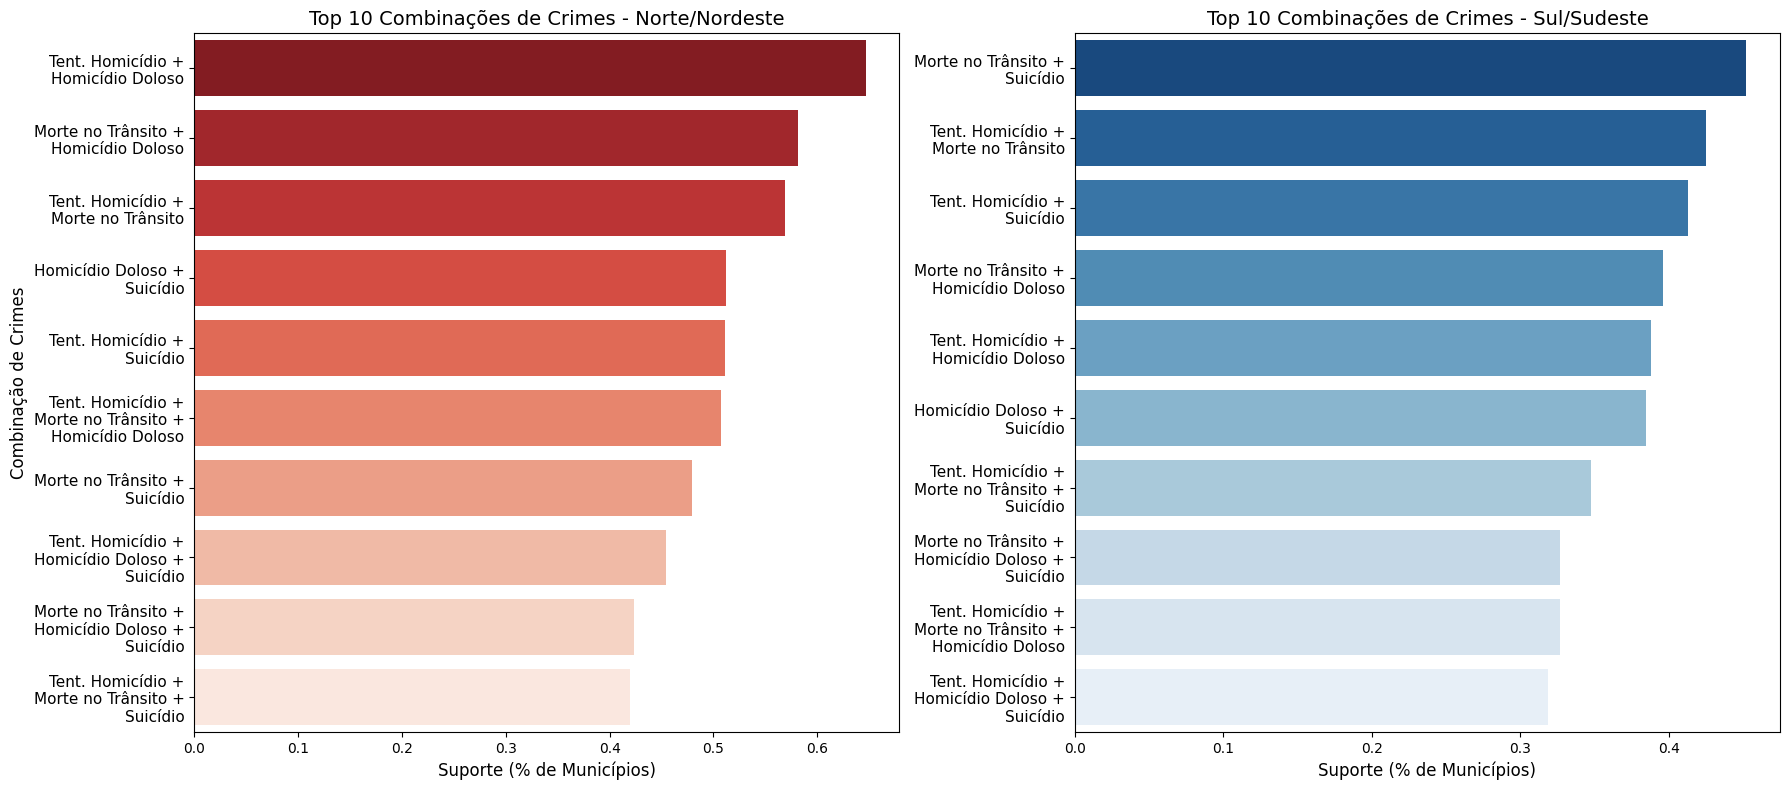

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico Norte/Nordeste
sns.barplot(x='support', y='itemsets_str', data=comb_n_ne, ax=axes[0], palette='Reds_r')
axes[0].set_title('Top 10 Combinações de Crimes - Norte/Nordeste', fontsize=14)
axes[0].set_xlabel('Suporte (% de Municípios)', fontsize=12)
axes[0].set_ylabel('Combinação de Crimes', fontsize=12)
axes[0].tick_params(axis='y', labelsize=11)

# Gráfico Sul/Sudeste
sns.barplot(x='support', y='itemsets_str', data=comb_s_se, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top 10 Combinações de Crimes - Sul/Sudeste', fontsize=14)
axes[1].set_xlabel('Suporte (% de Municípios)', fontsize=12)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()